# BT4012 Project Group 7

In [32]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
pd.set_option('display.max_columns', 500)

## 1. Data Extraction

We extract and combine different raw data tables into train and test tables.

### 1.1 Data Importing

In [33]:
# Import train and test data
beneficiary_test = pd.read_csv("./data/Test_Beneficiarydata-1542969243754.csv")
inpatient_test = pd.read_csv("./data/Test_Inpatientdata-1542969243754.csv")
outpatient_test = pd.read_csv("./data/Test_Outpatientdata-1542969243754.csv")
test = pd.read_csv("./data/Test-1542969243754.csv")

beneficiary_train = pd.read_csv("./data/Train_Beneficiarydata-1542865627584.csv")
inpatient_train = pd.read_csv("./data/Train_Inpatientdata-1542865627584.csv")
outpatient_train = pd.read_csv("./data/Train_Outpatientdata-1542865627584.csv")
train = pd.read_csv("./data/Train-1542865627584.csv")

In [34]:
# Beneficiary train data
beneficiary_train.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50


In [35]:
# Inpatient train data
inpatient_train.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


In [36]:
# Outpatient train data
outpatient_train.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380


In [37]:
# Labeled train data
train.head(2)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes


### 1.2 Data Merging


In [38]:
# create binary columns to indicate Inpatient status (1)
inpatient_train['is_inpatient'] = 1
outpatient_train['is_inpatient'] = 0

inpatient_test['is_inpatient'] = 1
outpatient_test['is_inpatient'] = 0

In [39]:
# concat inpatient and outpatient datasets to form a single patient column
patient_train = pd.concat([inpatient_train, outpatient_train])

patient_test = pd.concat([inpatient_test, outpatient_test])

In [40]:
# left join with beneficiary data on BeneID
patient_train = pd.merge(patient_train, beneficiary_train, how='left', on='BeneID')

patient_test = pd.merge(patient_test, beneficiary_test, how='left', on='BeneID')

In [41]:
# left join with label data on Provider
patient_train = pd.merge(patient_train, train, how='left', on='Provider')

patient_test = pd.merge(patient_test, test, how='left', on='Provider')

In [44]:
print(f"Shape of train data: {patient_train.shape}")
print(f"Shape of test data: {patient_test.shape}")

Shape of train data: (558211, 56)
Shape of test data: (135392, 55)


## 2. Feature Engineering

We relabel, encode and aggregate data as there are too many feature columns in our dataset, some of which are not very meaningful in raw data form.

In [31]:
patient_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 56 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   AdmissionDt                      40474 non-null   object 
 10  ClmAdmitDiagnosisCode            145899 non-null  object 
 11  DeductibleAmtPaid                557312 non-null  float64
 12  Di

### 2.1 Data Clarification
- Changing binary boolean features to 0/1 values (list the columns here) (Sebin)
- Replacing target label (`PotentialFraud`) to a binary value


In [64]:
patient_train['PotentialFraud'] = patient_train['PotentialFraud'].replace({'Yes': 1, 'No': 0})

### 2.2 Feature Engineering
- Make Age, IsDead, AdmitForDays from DOB, DOD, AdmissionDT, DischargeDT (Sebin)

- Other useful columns (Anthony)

### 2.3 Feature Aggregation
- Combine all diagnosis/ procedure/ physician into vector {Theja}

## 3. Data Preprocessing

We handle missing data and improve data quality.

### 3.1 Column Pruning
- Dropping unimportant columns that have been transformed


In [26]:
# list of irrelevant_columns
irrelevant_columns = []

# drop these columns in place
patient_train.drop(columns=irrelevant_columns, inplace=True)
patient_test.drop(columns=irrelevant_columns, inplace=True)

### 3.2 Data Imputation
- We handle missing values

In [ ]:
# Number of missing values in each columns
patient_train.isna().sum()

### 3.3 One-hot Encoding
- Creating dummy variables for categorical data (Race, Gender, State)

### 3.4 Frequency Encoding
- Frequency encode all the vectors feature

### 3.5 Data Scaling
- Scaling all numerical features

## 4. Exploratory Data Analysis

We explore `PotentialFraud` Proportion of different Features in Train data.

### 4.1 Overall Proportion

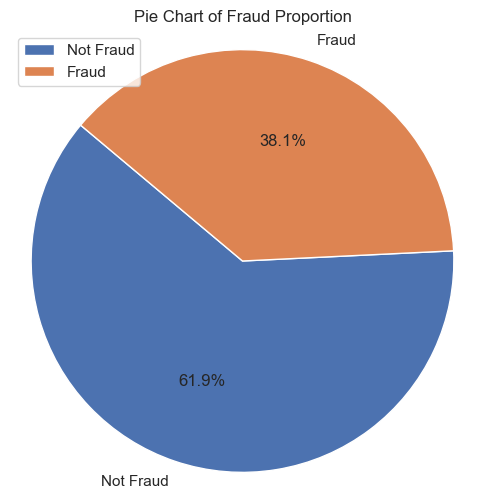

In [83]:
#@title Distribution of Fraud and non-Fraud

fraud_counts = patient_train['PotentialFraud'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.title('Pie Chart of Fraud Proportion')
plt.legend()
plt.show()

### 4.2 Proportion by Categorical Features

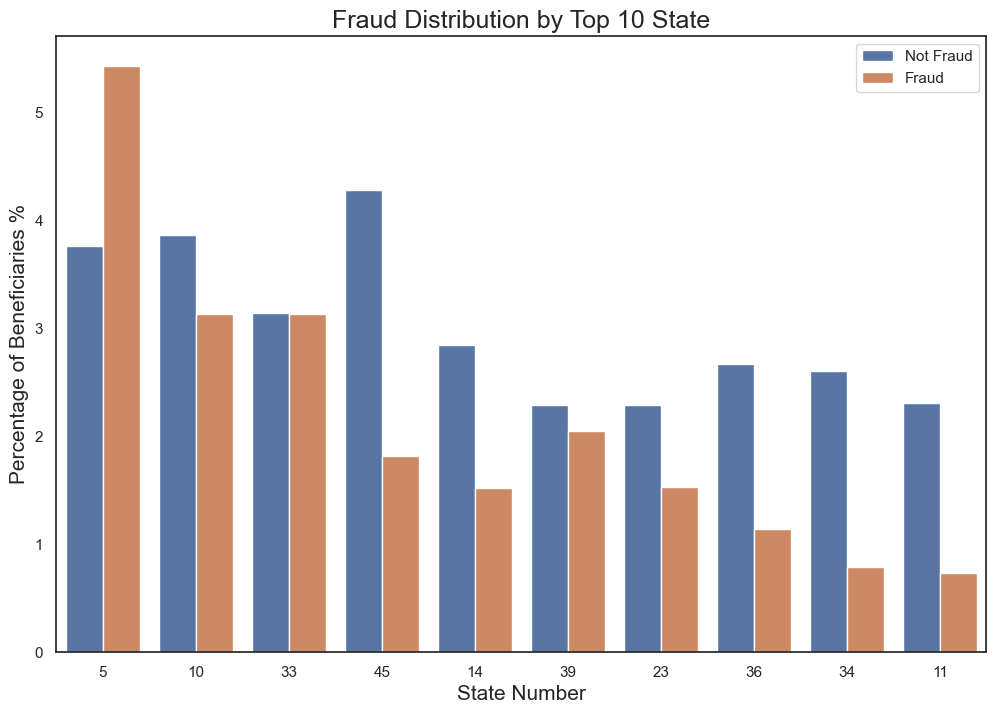

In [87]:
#@title Distribution of Frauds across top 10 States
sns.set(rc={'figure.figsize':(12,8)},style='white')
sns.countplot(x='State',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train['State'].value_counts().iloc[:10].index)

plt.title("Fraud Distribution by Top 10 State",fontsize=18)
plt.xlabel("State Number",fontsize=15)
plt.ylabel("Percentage of Beneficiaries %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])
plt.show()

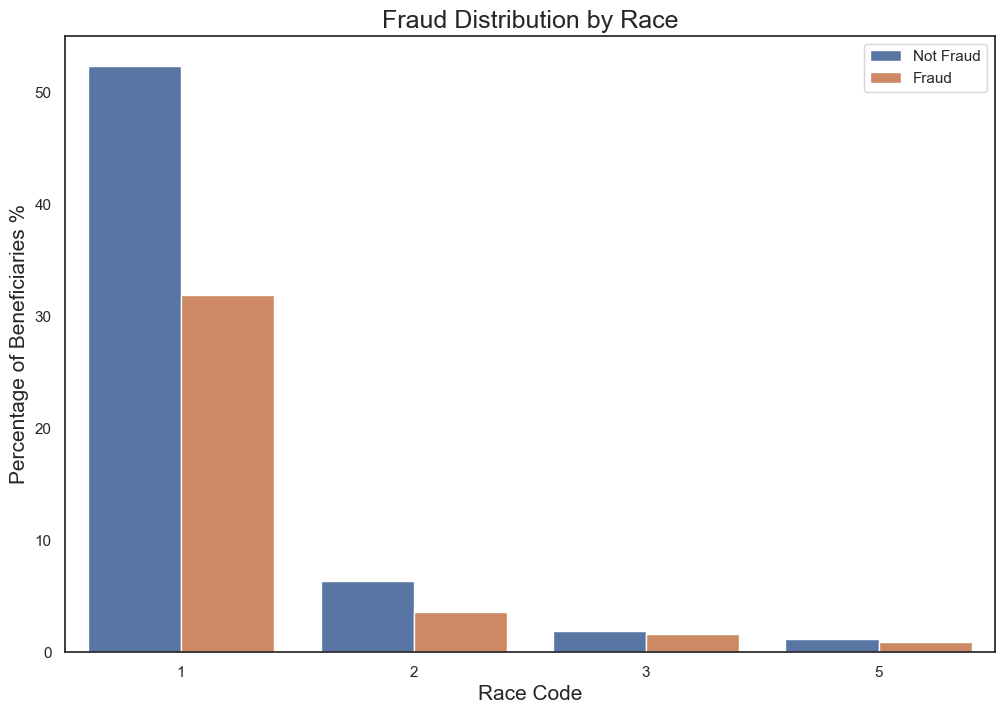

In [88]:
#@title Distribution of Race-wise beneficiaries
sns.set(rc={'figure.figsize':(12,8)},style='white')
sns.countplot(x='Race',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train['Race'].value_counts().iloc[:10].index)

plt.title("Fraud Distribution by Race",fontsize=18)
plt.xlabel("Race Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])
plt.show()


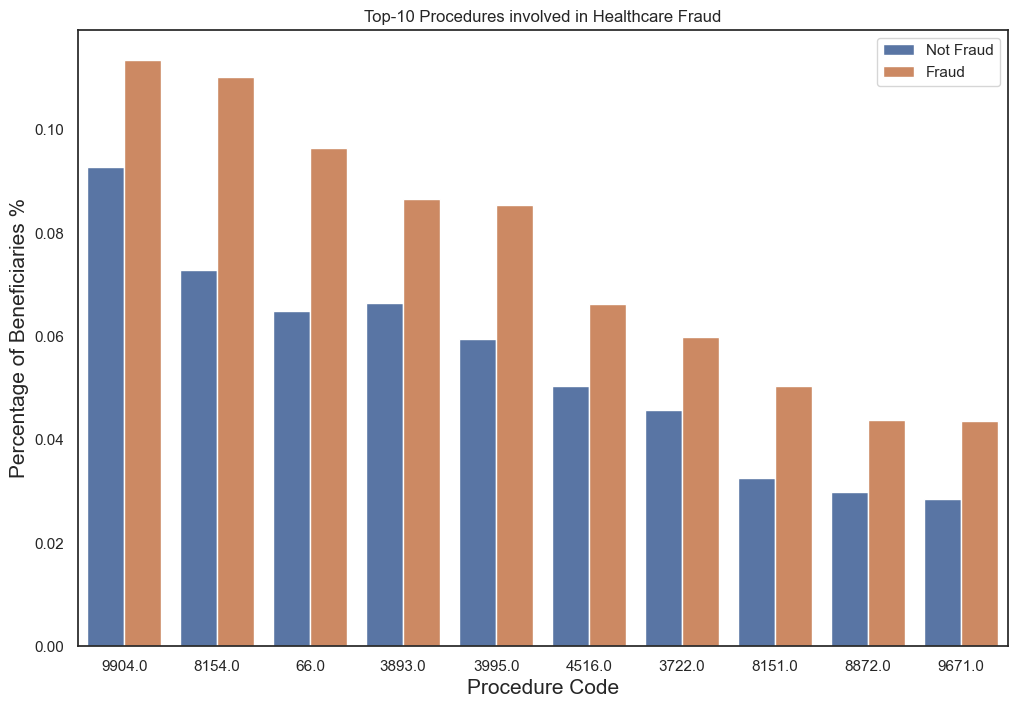

In [91]:
#@title Distribution of Fraud across top 10 Procedures

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='ClmProcedureCode_1',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train.ClmProcedureCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Procedures involved in Healthcare Fraud')
plt.xlabel("Procedure Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])
    
plt.show()


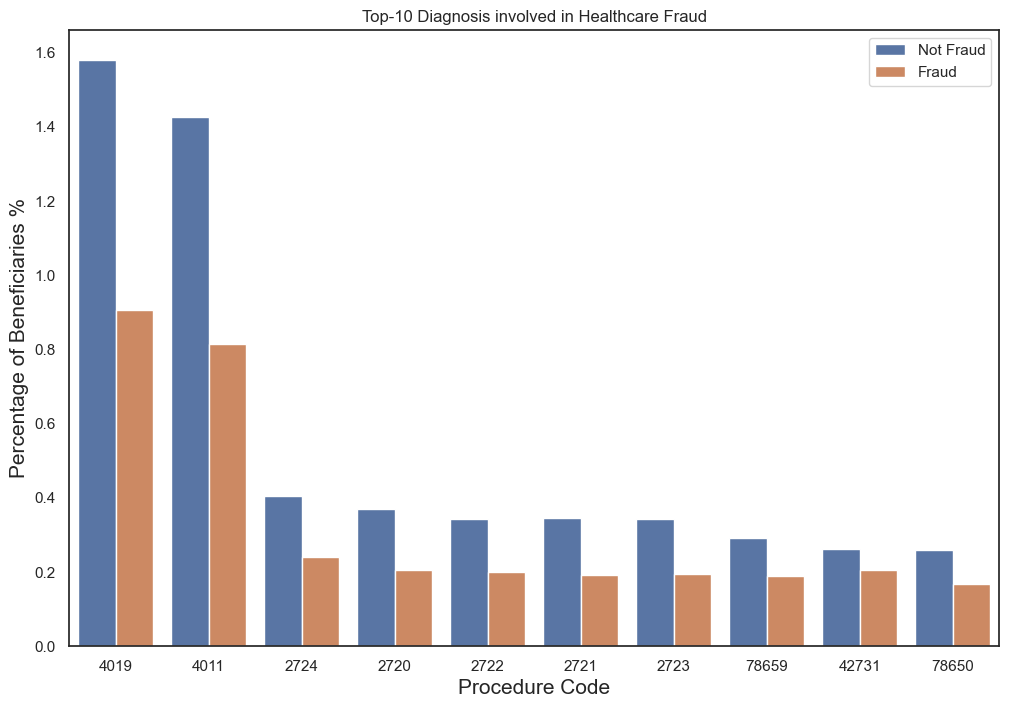

In [93]:
#@title Distribution of Fraud across top 10 Diagnosis

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='ClmDiagnosisCode_1',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train.ClmDiagnosisCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Diagnosis involved in Healthcare Fraud')
plt.xlabel("Procedure Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])
    
plt.show()

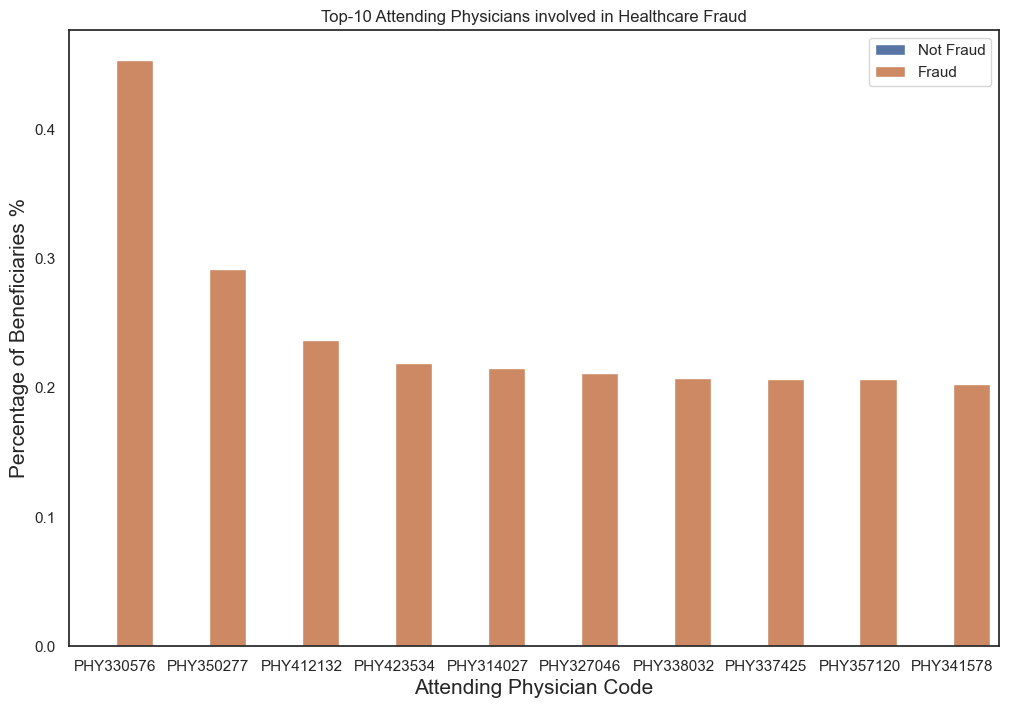

In [94]:
#@title Distribution of Fraud across Attending Physicians

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='AttendingPhysician',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train.AttendingPhysician.value_counts().iloc[:10].index)

plt.title('Top-10 Attending Physicians involved in Healthcare Fraud')
plt.xlabel("Attending Physician Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])
    
plt.show()

### 4.3 Distribution of Numerical Features

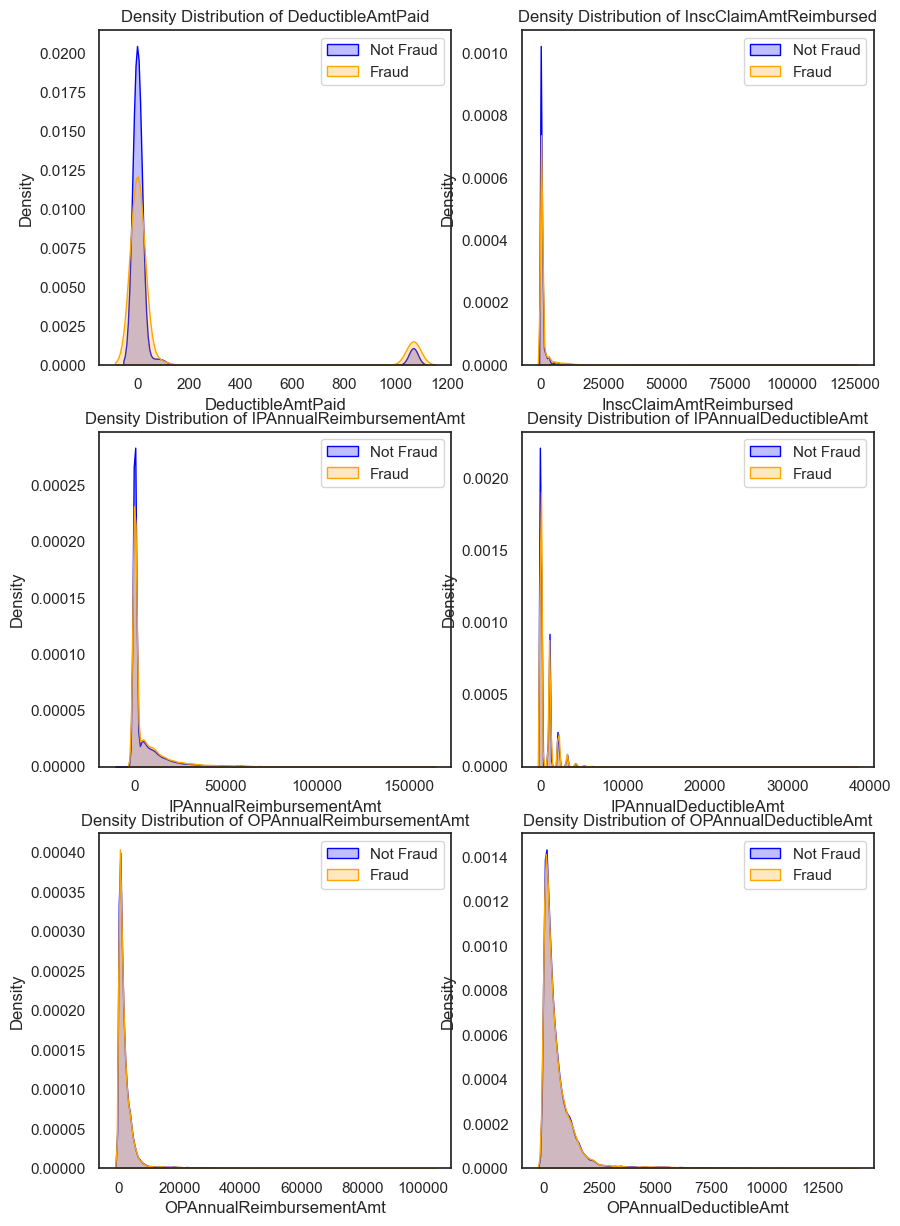

In [89]:
#@title Density Distribution of Numerical features
selected_col =  ['DeductibleAmtPaid', 'InscClaimAmtReimbursed', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
            'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']

num_rows = (len(selected_col) + 3) // 2  # Adjust based on the desired layout
num_cols = 2

plt.figure(figsize=(10, 5*num_rows))
for idx, column in enumerate(selected_col, start=1):
    plt.subplot(num_rows, num_cols, idx)
    sns.kdeplot(patient_train[patient_train['PotentialFraud'] == 0][column], fill=True, color="blue", label="Not Fraud")
    sns.kdeplot(patient_train[patient_train['PotentialFraud'] == 1][column], fill=True, color="orange", label="Fraud")
    plt.title(f"Density Distribution of {column}")
    plt.legend()

plt.show()

#### Missing values in Codes -- we suspect that only those with positive indication is filled in, else is left as blank, hence causing missing values

In [32]:
cat_codes = ['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
         'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
         'ClmDiagnosisCode_10']
num_codes = ['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
         'ClmProcedureCode_5']

#### Missing DeductibleAmtPaid -- check distribution of missing values against selected columns (selected based on self-logic).

Asumption: People who didnt pay ran away?

In [47]:
# temporirily create a column to replace 'AttendingPhysician' missing values with 0, and present values with 1
patient_train['DeductibleAmtPaid_temp'] = patient_train['DeductibleAmtPaid'].apply(lambda x: 0 if pd.isnull(x) else 1)

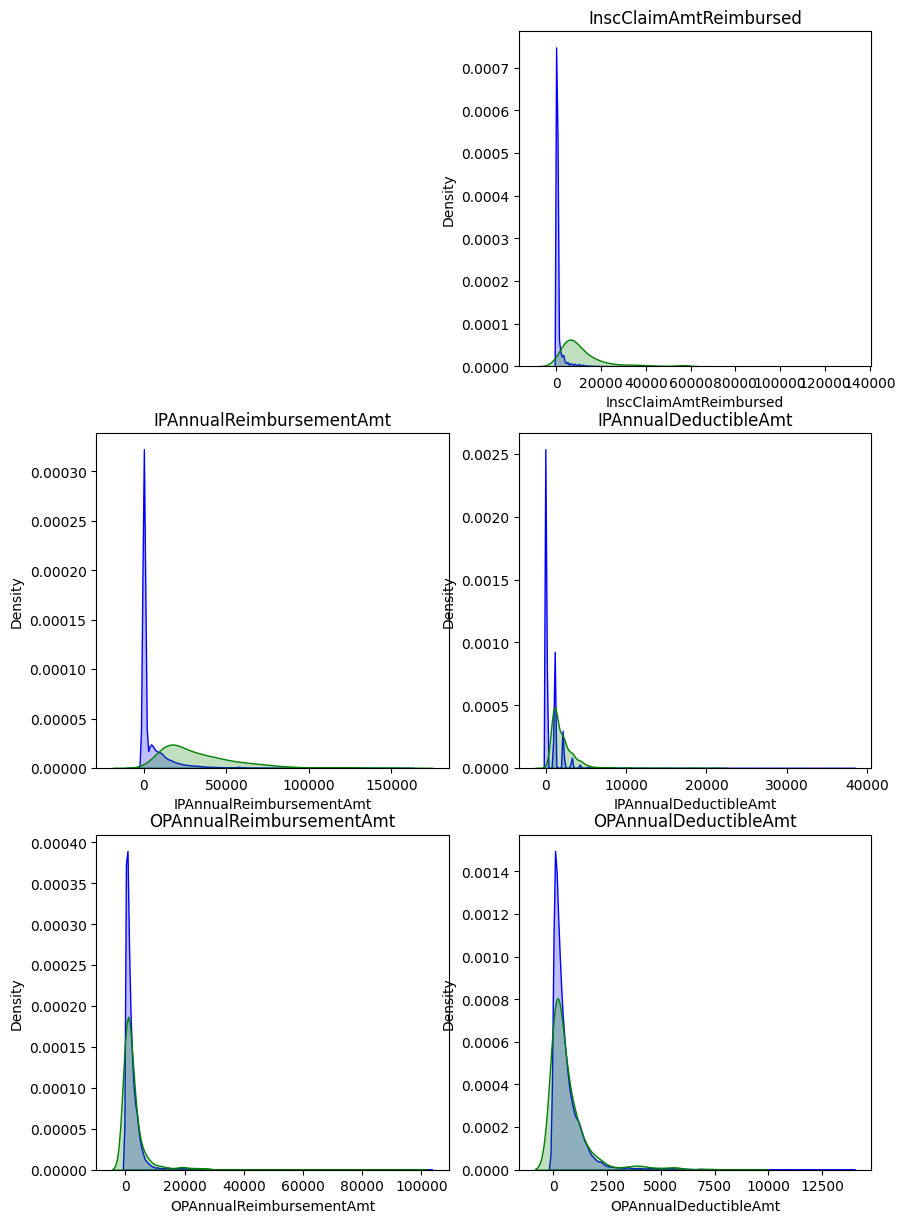

In [48]:
num_rows = (len(selected_col) + 3) // 2  # Adjust based on the desired layout
num_cols = 2

plt.figure(figsize=(10, 5*num_rows))
for idx, column in enumerate(selected_col, start=1):
    if column != 'DeductibleAmtPaid':
        plt.subplot(num_rows, num_cols, idx)
        sns.kdeplot(patient_train[patient_train["DeductibleAmtPaid_temp"]==1][column], fill=True, color="blue", label="like")
        sns.kdeplot(patient_train[patient_train["DeductibleAmtPaid_temp"]==0][column], fill=True, color="green", label="dislike")
        plt.title(column)

plt.show()

Observe that Missing values for DeductibleAmtPaid is associated with a righwards skew of InscClaimAmtReimbursed and IPAnnualReimbursementAmt -- meaning that missing values could be Missing Not At Random, where observations who don't pay are those with higher reimbursements (ie: they ran away with the money)

Hence, observe the distribution between missing vs non missing DeductibleAmtPaid against fradulent transactions

In [49]:
patient_train[patient_train['DeductibleAmtPaid'].isna()].groupby('PotentialFraud').count()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,is_inpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid_temp
PotentialFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,391,391,391,391,391,391,391,238,55,391,391,0,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,1,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391
Yes,508,508,508,508,508,508,508,306,43,508,508,0,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,5,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508


Observe that trend for missing DeductibleAmtPaid is the reverse of non missing DeductibleAmtPaid -- good chance that people actually ran away.

Hence, fair to impute the missing DeductibleAmtPaid values with -1.

In [50]:
# check that there are no zero values to begin with
len(patient_train[patient_train['DeductibleAmtPaid']==-1])

0

In [51]:
# drop temp column
patient_train.drop(['DeductibleAmtPaid_temp'], axis=1, inplace=True)

# replace missing with -1
patient_train['DeductibleAmtPaid'] = patient_train['DeductibleAmtPaid'].fillna(-1)

#### Missing OperatingPhysician --  check that all missing rows are associated with outpatient

Assumption: Patients who dont stay in the hospital do not require surgery, hence is Missing at Random

In [52]:
patient_train[patient_train['OperatingPhysician'].isna()]['is_inpatient'].unique()

array([1, 0])

Operating Physicians are present for both inpatient and outpatient. Maybe Operating Physicians can operate on outpatients too. Check distribution of missing vs non missing Operating Physicians on inpatient vs outpatients

<Axes: xlabel='OperatingPhysician_temp', ylabel='count'>

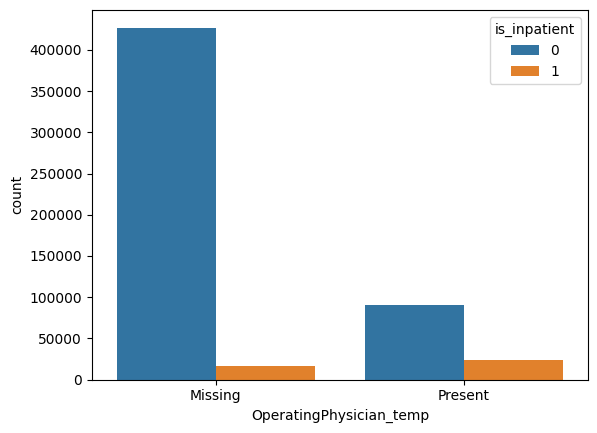

In [53]:
patient_train['OperatingPhysician_temp'] = patient_train['OperatingPhysician'].apply(lambda x: "Missing" if pd.isnull(x) else "Present")
sns.countplot(data=patient_train, x='OperatingPhysician_temp', hue='is_inpatient')

# Continuous Features Binning

All the datetime columns

In [60]:
date_cols = ['ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt', 'DOB']

In [61]:
# add month and day of week to all DT columns
for col in date_cols:
    patient_train[col] = pd.to_datetime(patient_train[col], format = '%Y-%m-%d')
    patient_train[col] = pd.to_datetime(patient_train[col], format = '%Y-%m-%d')
    patient_train[col + "_year"] = patient_train[col].dt.year
    patient_train[col + "_dayOfWeek"] = patient_train[col].dt.day_of_week
    patient_train[col + "_month"] = patient_train[col].dt.month

In [63]:
# get stay in time for inpatients
patient_train["admission_duration"]= (patient_train.DischargeDt - patient_train.AdmissionDt).dt.days
patient_train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,is_inpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,ClaimStartDt_year,ClaimStartDt_dayOfWeek,ClaimStartDt_month,ClaimEndDt_year,ClaimEndDt_dayOfWeek,ClaimEndDt_month,AdmissionDt_year,AdmissionDt_dayOfWeek,AdmissionDt_month,DischargeDt_year,DischargeDt_dayOfWeek,DischargeDt_month,DOB_year,DOB_dayOfWeek,DOB_month,admission_duration
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NA,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NA,0.0,0.0,0.0,0.0,0.0,1,1943-01-01,1800-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes,2009,6,4,2009,5,4,2009,6,4,2009,5,4,1943,4,1,6
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NA,NA,NA,NA,NA,NA,NA,7092.0,0.0,0.0,0.0,0.0,1,1943-01-01,1800-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No,2009,0,8,2009,2,9,2009,0,8,2009,2,9,1943,4,1,2
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NA,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NA,NA,NA,NA,0.0,0.0,0.0,0.0,0.0,1,1943-01-01,1800-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No,2009,3,9,2009,6,9,2009,3,9,2009,6,9,1943,4,1,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NA,331.0,0.0,0.0,0.0,0.0,1,1914-03-01,1800-01-01,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,No,2009,5,2,2009,6,2,2009,5,2,2009,6,2,1914,6,3,8
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NA,3893.0,0.0,0.0,0.0,0.0,1,1938-04-01,1800-01-01,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,No,2009,3,8,2009,6,8,2009,3,8,2009,6,8,1938,4,4,17


# Feature Engineering

Check the number of unique values in each of the codes to get an estimate of feature value dimensionality

In [70]:
codes = ['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
         'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
         'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
         'ClmProcedureCode_5']

for code in codes:
    print(f'number of unique values in {code}: {patient_train[code].nunique()}')

number of unique values in ClmAdmitDiagnosisCode: 4099
number of unique values in ClmDiagnosisCode_1: 10451
number of unique values in ClmDiagnosisCode_2: 5301
number of unique values in ClmDiagnosisCode_3: 4757
number of unique values in ClmDiagnosisCode_4: 4360
number of unique values in ClmDiagnosisCode_5: 3971
number of unique values in ClmDiagnosisCode_6: 3608
number of unique values in ClmDiagnosisCode_7: 3389
number of unique values in ClmDiagnosisCode_8: 3071
number of unique values in ClmDiagnosisCode_9: 2775
number of unique values in ClmDiagnosisCode_10: 1159
number of unique values in ClmProcedureCode_1: 1118
number of unique values in ClmProcedureCode_2: 301
number of unique values in ClmProcedureCode_3: 155
number of unique values in ClmProcedureCode_4: 49
number of unique values in ClmProcedureCode_5: 7


Almost all the codes have high feature value dimensionality. One Hot Encoding would result in a very high dimensional dataframe, hence use (non-ordinal) frequency encoding instead.

Replace all codes with frequency encoding

In [71]:
import category_encoders as ce

for code in codes:
    encoder = ce.CountEncoder(cols=code)
    patient_train[code + "_frequency_encoded"] = encoder.fit_transform(patient_train[code])

### Data Transformation

In [74]:
num_cols_log = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'admission_duration']

In [75]:
X_train_log_transformed = patient_train.copy()

for col in num_cols_log:
    # replace the 0 with some very small number close to 0 (because log0 is a math error)
    X_train_log_transformed[col] = X_train_log_transformed[col].replace(0, 0.00000000000001)
    X_train_log_transformed[col + '_log'] = np.log(X_train_log_transformed[col])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Data Scaling for Numerical Columns

In [77]:
features_to_scale = patient_train.select_dtypes(include=['number']).columns

Standard Scaler -- For algorithms that assumes a normal distribution

In [78]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

# fit and transform the scaler
X_train_standard_scaled = patient_train.copy()
X_train_standard_scaled[features_to_scale] = standardScaler.fit_transform(X_train_standard_scaled[features_to_scale])

'''# transform the testing set to the same scale as the training set
X_test_scaled = patient_test.copy()
X_test_scaled[features_to_scale] = scaler.transform(X_test_scaled[features_to_scale])'''

'# transform the testing set to the same scale as the training set\nX_test_scaled = patient_test.copy()\nX_test_scaled[features_to_scale] = scaler.transform(X_test_scaled[features_to_scale])'

MinMax Scaler -- For algorithms that rely on distance to perform classifications

In [79]:
from sklearn.preprocessing import MinMaxScaler

minmaxScaler = MinMaxScaler()

# fit and transform the scaler
X_train_minmax_scaled = patient_train.copy()
X_train_minmax_scaled[features_to_scale] = minmaxScaler.fit_transform(X_train_minmax_scaled[features_to_scale])

### Final Feature and Target Columns

In [80]:
patient_train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'is_inpatient', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diab

In [81]:
feature_cols = ['ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'DeductibleAmtPaid', 
       'is_inpatient', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt',  'ClaimStartDt_year',
       'ClaimStartDt_dayOfWeek', 'ClaimStartDt_month', 'ClaimEndDt_year',
       'ClaimEndDt_dayOfWeek', 'ClaimEndDt_month', 'AdmissionDt_year',
       'AdmissionDt_dayOfWeek', 'AdmissionDt_month', 'DischargeDt_year',
       'DischargeDt_dayOfWeek', 'DischargeDt_month', 'DOB_year',
       'DOB_dayOfWeek', 'DOB_month', 'admission_duration',
       'ClmAdmitDiagnosisCode_frequency_encoded',
       'ClmDiagnosisCode_1_frequency_encoded',
       'ClmDiagnosisCode_2_frequency_encoded',
       'ClmDiagnosisCode_3_frequency_encoded',
       'ClmDiagnosisCode_4_frequency_encoded',
       'ClmDiagnosisCode_5_frequency_encoded',
       'ClmDiagnosisCode_6_frequency_encoded',
       'ClmDiagnosisCode_7_frequency_encoded',
       'ClmDiagnosisCode_8_frequency_encoded',
       'ClmDiagnosisCode_9_frequency_encoded',
       'ClmDiagnosisCode_10_frequency_encoded',
       'ClmProcedureCode_1_frequency_encoded',
       'ClmProcedureCode_2_frequency_encoded',
       'ClmProcedureCode_3_frequency_encoded',
       'ClmProcedureCode_4_frequency_encoded',
       'ClmProcedureCode_5_frequency_encoded']
target_col = ['PotentialFraud']
X_train = patient_train[feature_cols].copy()
y_train = patient_train[target_col].copy()

# X_test  = test_dataset[feature_cols].copy()
# y_test  = test_dataset[target_col].copy()

In [82]:
X_train.head()

,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,DeductibleAmtPaid,is_inpatient,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimStartDt_year,ClaimStartDt_dayOfWeek,ClaimStartDt_month,ClaimEndDt_year,ClaimEndDt_dayOfWeek,ClaimEndDt_month,AdmissionDt_year,AdmissionDt_dayOfWeek,AdmissionDt_month,DischargeDt_year,DischargeDt_dayOfWeek,DischargeDt_month,DOB_year,DOB_dayOfWeek,DOB_month,admission_duration,ClmAdmitDiagnosisCode_frequency_encoded,ClmDiagnosisCode_1_frequency_encoded,ClmDiagnosisCode_2_frequency_encoded,ClmDiagnosisCode_3_frequency_encoded,ClmDiagnosisCode_4_frequency_encoded,ClmDiagnosisCode_5_frequency_encoded,ClmDiagnosisCode_6_frequency_encoded,ClmDiagnosisCode_7_frequency_encoded,ClmDiagnosisCode_8_frequency_encoded,ClmDiagnosisCode_9_frequency_encoded,ClmDiagnosisCode_10_frequency_encoded,ClmProcedureCode_1_frequency_encoded,ClmProcedureCode_2_frequency_encoded,ClmProcedureCode_3_frequency_encoded,ClmProcedureCode_4_frequency_encoded,ClmProcedureCode_5_frequency_encoded
0,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NA,NaN,1068.0,1,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,2009,6,4,2009,5,4,2009,6,4,2009,5,4,1943,4,1,6,252,66,22378,595,76,459,535,1536,19,327,553201,534901,552721,557242,558093,558202
1,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,1068.0,1,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,2009,0,8,2009,2,9,2009,0,8,2009,2,9,1943,4,1,2,4,21,1246,621,393675,446287,473819,492034,504767,516396,553201,14,552721,557242,558093,558202
2,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NA,PHY324689,1068.0,1,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,2009,3,9,2009,6,9,2009,3,9,2009,6,9,1943,4,1,3,140,128,132,714,289,85,184,492034,504767,516396,553201,534901,552721,557242,558093,558202
3,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,1068.0,1,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,2009,5,2,2009,6,2,2009,5,2,2009,6,2,1914,6,3,8,90,696,175,103,254,19,277,20,389,1581,553201,100,552721,557242,558093,558202
4,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,1068.0,1,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,2009,3,8,2009,6,8,2009,3,8,2009,6,8,1938,4,4,17,165,90,2685,52,576,114,339,190,28,20,553201,854,552721,557242,558093,558202


### Dimensionality Reduction -- Principal Component Analysis

KIV: can include gridsearch/ kfold validation here to determine best number of PCA

In [83]:
from sklearn.decomposition import PCA

# Perform PCA with 3 components on the standard scaled dataset
pca = PCA(n_components=10, random_state=0)
pca.fit(X_train_standard_scaled[features_to_scale])

# Create a DataFrame to store the PCA results
PCA_ds = pd.DataFrame(pca.transform(X_train_standard_scaled[features_to_scale]), 
                      columns=["col1", "col2", "col3","col4","col5",'col6','col7','col8','col9','col10'])

# Display summary statistics of the PCA results
PCA_summary = PCA_ds.describe().T
print(PCA_summary)

          count          mean       std        min       25%       50%  \
col1   558211.0 -2.093654e-16  3.392344  -2.051888 -1.470852 -1.128628   
col2   558211.0 -5.514171e-17  1.790735 -11.164290 -0.953059  0.071641   
col3   558211.0  1.127274e-16  1.727844  -4.943692 -0.849390 -0.103498   
col4   558211.0  1.574823e-16  1.578931  -9.973034 -0.868616 -0.350046   
col5   558211.0 -2.884375e-17  1.432079  -4.621202 -1.189002 -0.002416   
col6   558211.0 -1.428186e-17  1.379378 -29.479154 -0.416042  0.008363   
col7   558211.0 -6.631771e-17  1.369840 -11.306860 -1.113326 -0.007524   
col8   558211.0 -4.307469e-17  1.264622 -19.217249 -0.697956 -0.090350   
col9   558211.0  3.102676e-17  1.154851 -86.398762 -0.318871 -0.005155   
col10  558211.0  1.476556e-16  1.112131 -15.861822 -0.669786  0.044161   

            75%         max  
col1  -0.468633   32.108185  
col2   1.043817  130.065592  
col3   0.694029  204.038773  
col4   0.624700  168.568622  
col5   1.193523   28.972971  
col6 

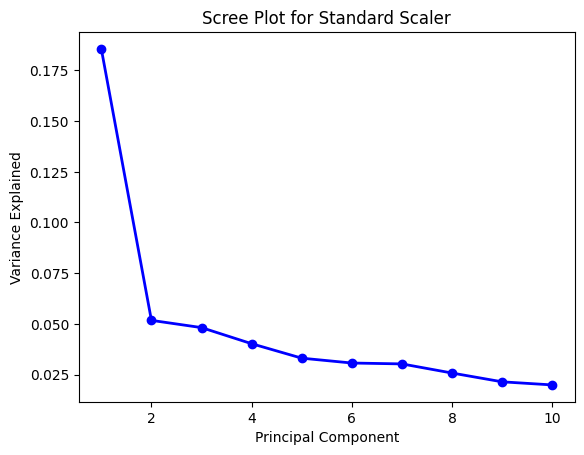

In [84]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot for Standard Scaler')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Ideal PC = 2 for standard scaler

In [85]:
# Perform PCA with 3 components on the minmax scaled dataset
pca_minmax = PCA(n_components=10, random_state=0)
pca_minmax.fit(X_train_minmax_scaled[features_to_scale])

# Create a DataFrame to store the PCA results
PCA_ds = pd.DataFrame(pca_minmax.transform(X_train_minmax_scaled[features_to_scale]), 
                      columns=["col1", "col2", "col3","col4","col5",'col6','col7','col8','col9','col10'])

# Display summary statistics of the PCA results
PCA_summary = PCA_ds.describe().T
print(PCA_summary)

          count          mean       std       min       25%       50%  \
col1   558211.0  9.602703e-17  0.982246 -1.166688 -0.656884 -0.334127   
col2   558211.0  2.998935e-17  0.720092 -1.843221 -0.540933 -0.004184   
col3   558211.0  3.859411e-17  0.565345 -1.082346 -0.508599  0.014720   
col4   558211.0  8.197429e-18  0.495486 -0.825141 -0.426138 -0.276463   
col5   558211.0  5.658645e-17  0.481292 -0.901176 -0.388189 -0.249335   
col6   558211.0  3.538642e-17  0.471759 -1.271297 -0.324831 -0.014422   
col7   558211.0  1.108053e-17  0.468431 -1.161452 -0.350478  0.009795   
col8   558211.0 -1.011727e-16  0.450833 -1.238270 -0.329844 -0.001234   
col9   558211.0 -6.080609e-17  0.448839 -1.224383 -0.283271 -0.025073   
col10  558211.0  1.199065e-16  0.446988 -1.405103 -0.320643 -0.004521   

            75%       max  
col1   0.306624  3.442997  
col2   0.539984  2.214312  
col3   0.402648  2.274491  
col4   0.541849  0.888615  
col5   0.550583  0.929428  
col6   0.324322  1.697916  


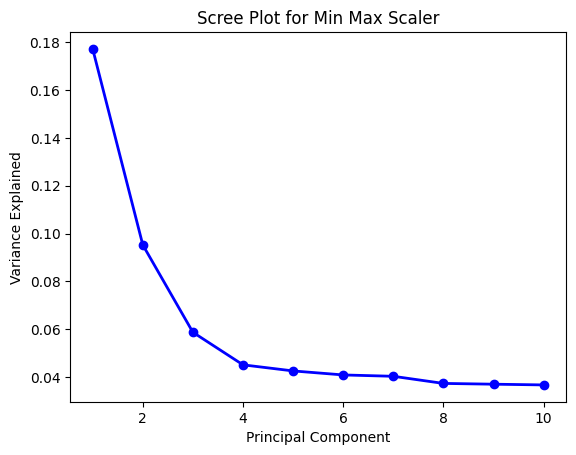

In [86]:
PC_values = np.arange(pca_minmax.n_components_) + 1
plt.plot(PC_values, pca_minmax.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot for Min Max Scaler')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Ideal PC = 4